# Week 1 Exercise

In [1]:
knitr::opts_chunk$set(echo = TRUE)
suppressPackageStartupMessages(library(tidyverse))
cel <- suppressMessages(drop_na(read_csv("cel_volden_wiseman_coursera.csv")))

Your objective is to replicate these figures, created using the Center of
Legislative Effectiveness Data. These figures are similar to those we
completed in the lecture videos.

### Put your name here: Marcio Woitek

**IMPORTANT: Filter your data so you are only displaying information for the
115th Congress.**

## Exercise 1

Hints:

* For the x-axis, use the variable `dwnom1`.
* For the y-axis, use the variable `all_pass`.
* Make sure you recode the data for the `female` variable and rename it as
`Gender` to generate the correct labels for the legend.
* Set the color aesthetic in the `ggplot()` function to make the color of the
dots change based on `Gender`.
* Make sure the axis labels are correct.

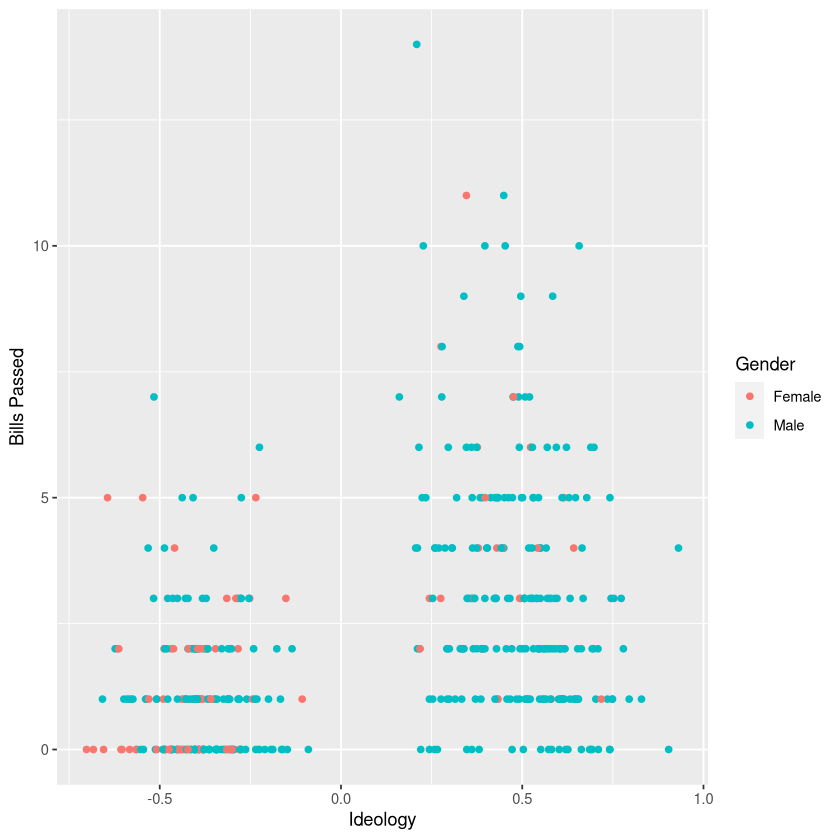

In [2]:
# Get only the data corresponding to the 115th Congress.
# Get only the columns that matter for this exercise.
data_plot_1 <- cel %>%
    filter(congress == 115) %>%
    select(dwnom1, all_pass, female)

# Recode the `female` variable, and rename it as `Gender`:
data_plot_1$female <- recode(data_plot_1$female, `0` = "Male", `1` = "Female")
data_plot_1 <- rename(data_plot_1, Gender = female)

# Plot the figure as specified above:
ggplot(data_plot_1, aes(x = dwnom1, y = all_pass, color = Gender)) +
    geom_point() +
    labs(x = "Ideology", y = "Bills Passed")

## Exercise 2

Hints:

* For the x-axis, use the variable `votepct`.
* For the y-axis, use `all_pass`.
* Make sure you recode the data for the `female` variable to generate the
correct labels for the legend. Rename that column `Gender` (you may have
already done this in the last exercise).
* Make sure you recode the data for `majority` variable to generate the
correct labels of the faceted figures.
* Set the color aesthetic in the `ggplot()` function to make the color of the
dots change based on `Gender`.
* Use `scale_color_manual()` to set the colors to green for males and orange
for females.
* Make sure the axis labels are correct.

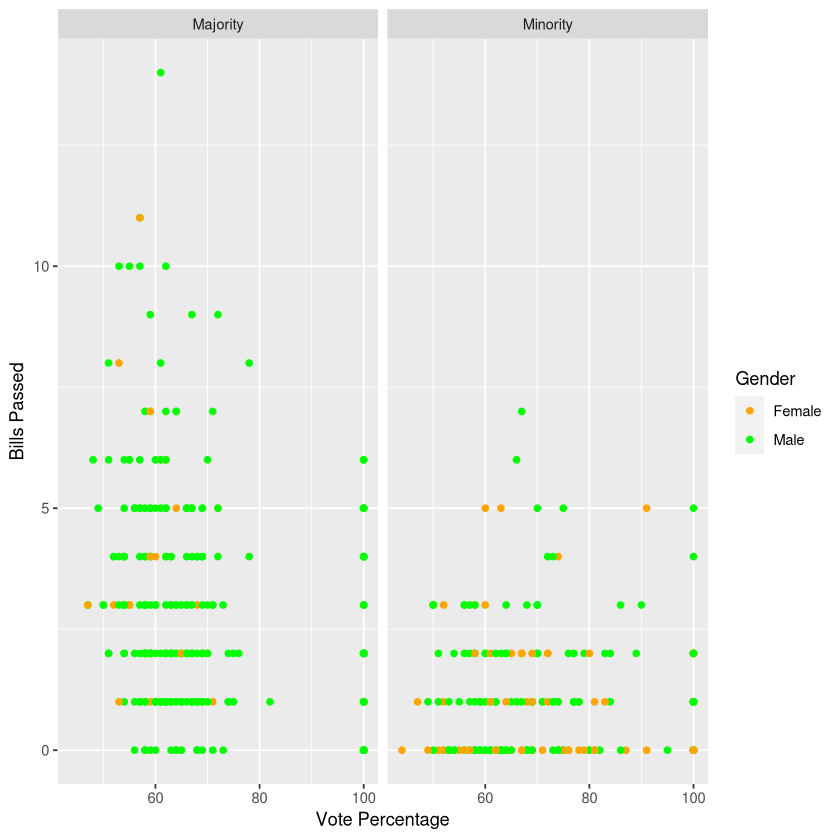

In [3]:
# Get only the data corresponding to the 115th Congress.
# Get only the columns that matter for this exercise.
data_plot_2 <- cel %>%
    filter(congress == 115) %>%
    select(votepct, all_pass, female, majority)

# Recode the `female` variable, and rename it as `Gender`:
data_plot_2$female <- recode(data_plot_2$female, `0` = "Male", `1` = "Female")
data_plot_2 <- rename(data_plot_2, Gender = female)

# Recode the `majority` variable:
data_plot_2$majority <- recode(
    data_plot_2$majority, `0` = "Minority", `1` = "Majority"
)

# Plot the figure as specified above:
ggplot(data_plot_2, aes(x = votepct, y = all_pass, color = Gender)) +
    geom_point() +
    labs(x = "Vote Percentage", y = "Bills Passed") +
    scale_color_manual(values = c("orange", "green")) +
    facet_wrap(vars(majority))

## Exercise 3

Hints:

* For the y-axis, use the variable `les`.
* Make sure you recode the data for the `majority` variable to generate the
correct labels (you may have already done this in the last exercise).
* Make sure the axis labels and figure title are correct.

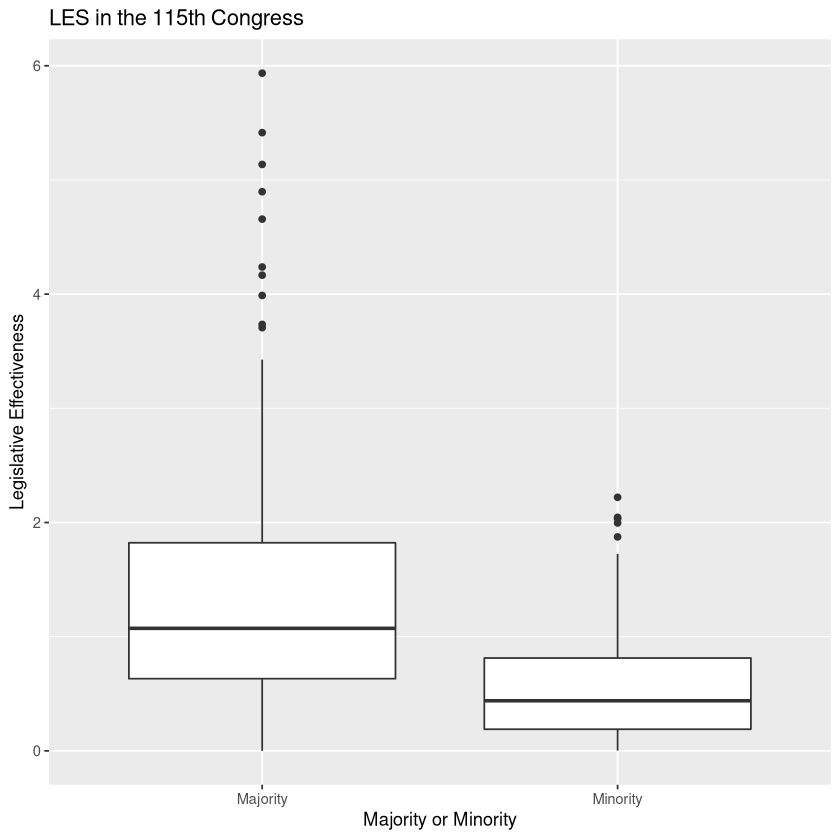

In [4]:
# Get only the data corresponding to the 115th Congress.
# Get only the columns that matter for this exercise.
data_plot_3 <- cel %>%
    filter(congress == 115) %>%
    select(les, majority)

# Recode the `majority` variable:
data_plot_3$majority <- recode(
    data_plot_3$majority, `0` = "Minority", `1` = "Majority"
)

# Plot the figure as specified above:
ggplot(data_plot_3, aes(x = majority, y = les)) +
    geom_boxplot() +
    labs(
        x = "Majority or Minority",
        y = "Legislative Effectiveness",
        title = "LES in the 115th Congress"
    )